In [1]:
import tensorflow as tf
tf.__version__

'2.11.0'

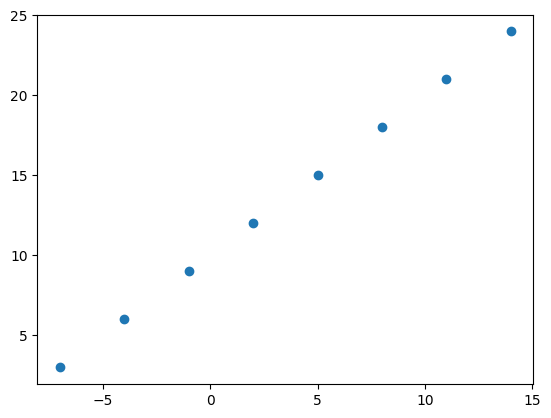

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y);
plt.show()

In [3]:
house_info = tf.constant(['bedroom', 'bathroom','garage'])
house_price =tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X[0]

-7.0

In [5]:
X[0].shape

()

In [6]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), 
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=['mae'])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 495ms/step - loss: 13.5605 - mae: 13.5605
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4917 - mae: 13.4917
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4230 - mae: 13.4230
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3544 - mae: 13.3544
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2858 - mae: 13.2858
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2172 - mae: 13.2172
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.1486 - mae: 13.1486
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0801 - mae: 13.0801
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0116 - mae: 13.0116
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9432 - mae: 12.9432
Epoch 11/100
1/1 [==============================] - 0s 6m

In [8]:
model.predict([17])

1/1 [==============================] - 1s 717ms/step


array([[31.30933]], dtype=float32)

In [9]:
X = np.arange(-100,100,4)

In [10]:
y=np.arange(-90,110,4)

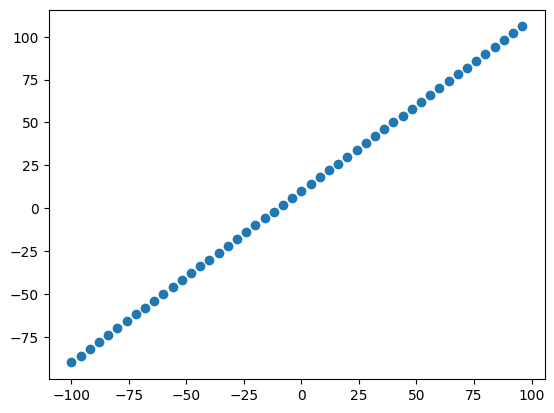

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [12]:
len(X)

50

In [13]:
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [14]:
X_train = X[:40]

In [15]:
X_test = X[40:]

In [16]:
y_train = y[:40]

In [17]:
y_test = y[40:]

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend()

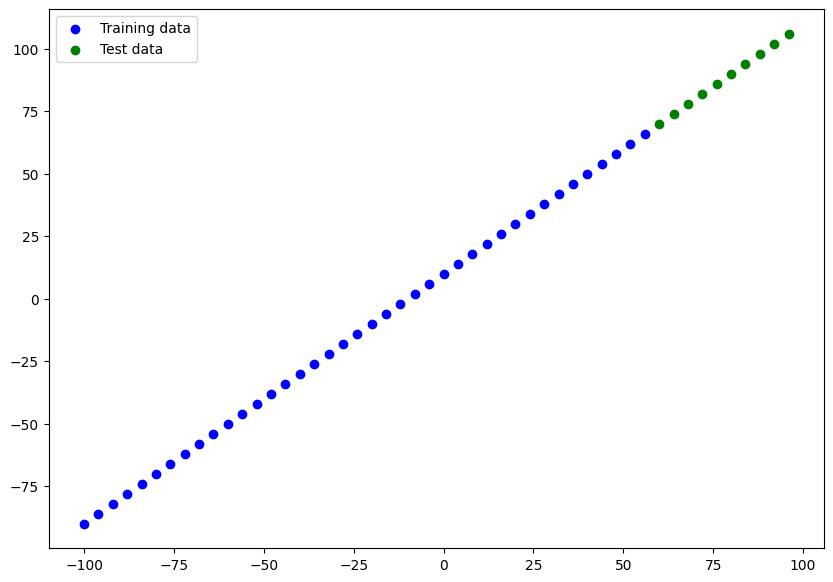

In [19]:
plt.show()

In [20]:
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs=140, verbose=0)

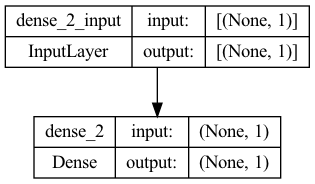

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [24]:
!pip install pydot

In [25]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 41ms/step


In [26]:
y_pred

array([[-45.136333],
       [-48.13274 ],
       [-51.129147],
       [-54.12555 ],
       [-57.121952],
       [-60.11836 ],
       [-63.114765],
       [-66.11117 ],
       [-69.107574],
       [-72.10398 ]], dtype=float32)

In [27]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [28]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()
    plt.show()



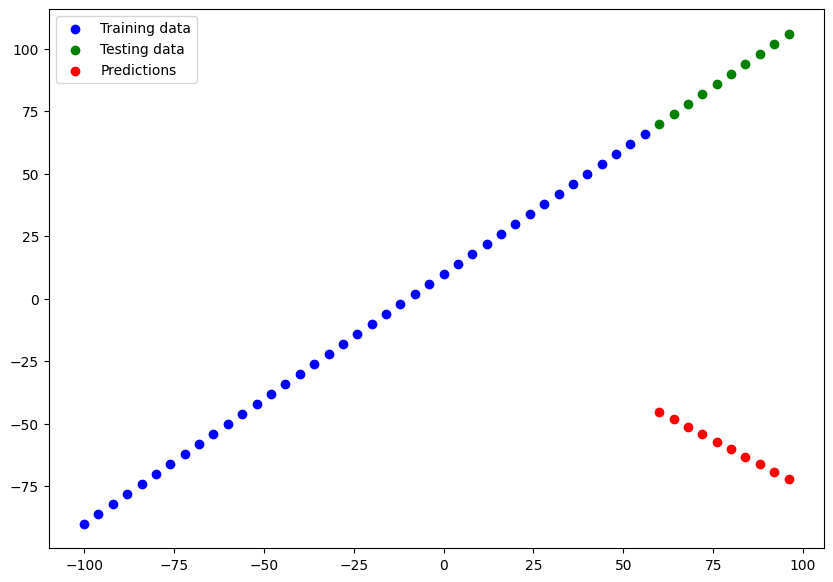

In [29]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [30]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 587ms/step - loss: 146.6201 - mae: 146.6201


[146.62014770507812, 146.62014770507812]

In [31]:
y_pred.shape

(10, 1)

In [32]:
y_pred.squeeze().shape

(10,)

In [33]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred.squeeze())

In [34]:
mae.numpy()

146.62015

In [35]:
mse = tf.metrics.mse(y_true=y_test,y_pred=y_pred.squeeze())

In [36]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=21901.307>

In [37]:
X_train, y_train

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66]))

In [38]:
tf.random.set_seed(42)

In [39]:
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

In [40]:
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 53.4147 - mae: 53.4147
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 19.6603 - mae: 19.6603
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2780 - mae: 11.2780
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5840 - mae: 9.5840
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4938 - mae: 10.4938
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.7190 - mae: 9.7190
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8134 - mae: 8.8134
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0760 - mae: 9.0760
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.3378 - mae: 19.3378
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.4487 - mae: 10.4487
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 42ms/step


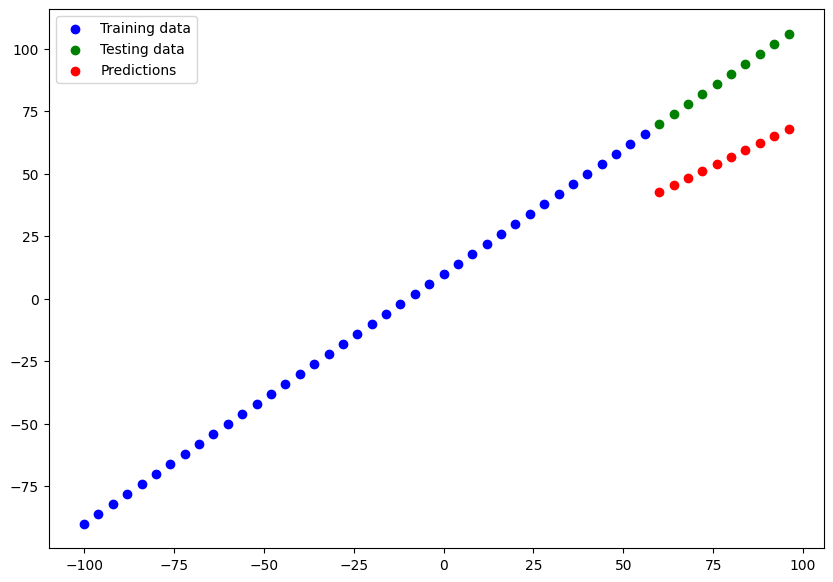

In [41]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)


In [42]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [43]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(32.69443, 1081.4067)

In [44]:
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

In [45]:
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 43ms/step


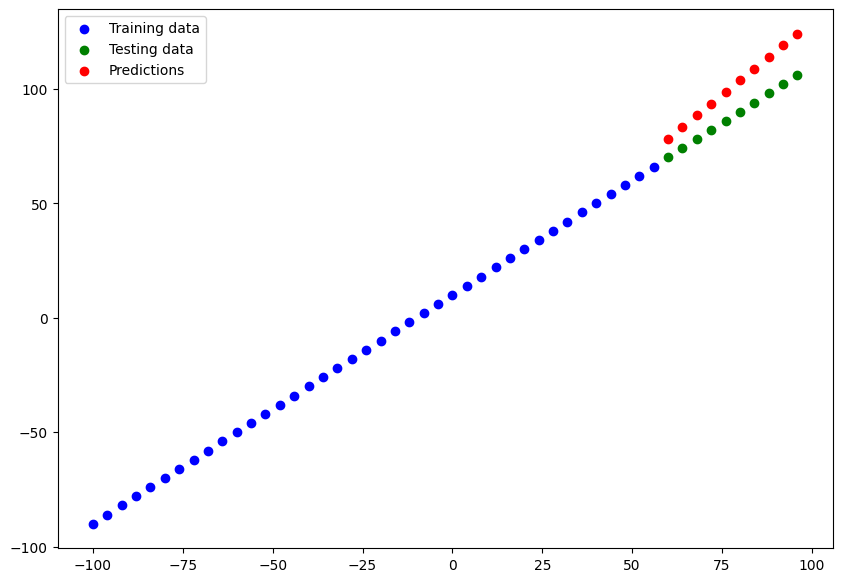

In [46]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [47]:
y_preds_2.shape

(10, 1)

In [48]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.115929, 181.9144)

In [49]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 48ms/step


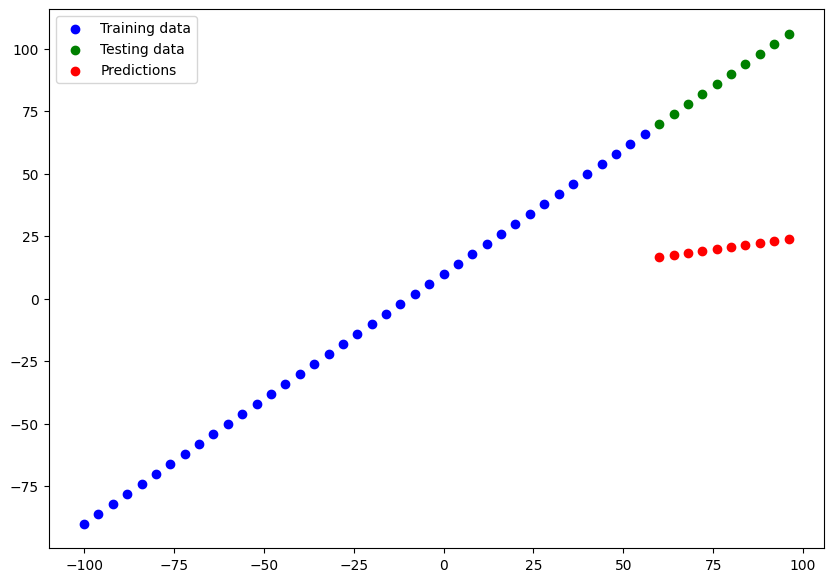

In [50]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [51]:
# Calculate model_2 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.56211, 4648.5405)

In [52]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [53]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.694431,1081.406738
1,model_2,13.115929,181.914398
2,model_3,67.562111,67.562111


In [54]:
model_2.save('best_model')

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


In [55]:
model_2.save('best_model_HDF5.h5')

In [56]:
loaded_model = tf.keras.models.load_model('best_model')

In [57]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [58]:
loaded_model_preds = loaded_model.predict(X_test)
model_2_preds = model_2.predict(X_test)


1/1 [==============================] - 0s 33ms/step


In [59]:
mae(y_test, loaded_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [60]:
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5.h5')
h5_pred = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 42ms/step


In [61]:
mae(y_test, h5_pred.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [62]:
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [63]:
!ls

DATA                     SOLUTIONS.ipynb          Untitled.ipynb
EXAMPLE_FOR_TF_CERT.py   TF_CLASSIFICATION.ipynb  best_model
EXERCISES.ipynb          TF_COMPUTER_VISION.ipynb best_model_HDF5.h5
FIGURES                  TF_FUNDAMENTALS.ipynb    insurance.csv
NUMPY.ipynb              TF_NLP.ipynb             model.png
PANDAS.ipynb             TF_REGRESSION.ipynb
README.md                TF_TIME_SERIES.ipynb


In [64]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [69]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [70]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [73]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [74]:
tf.random.set_seed(42)

In [75]:
X_train.shape

(1070, 11)

In [76]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

In [77]:
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

In [79]:
%%timeit
history = insurance_model.fit(X_train, y_train, epochs=200,verbose=0)

7 s ± 296 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [143]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.0923 - mae: 3161.0923


[3161.09228515625, 3161.09228515625]

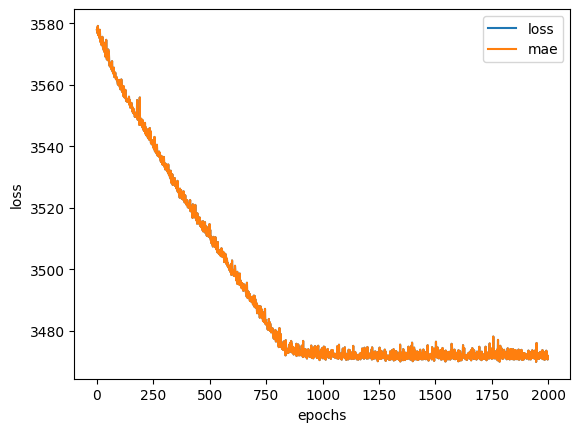

In [144]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [145]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [146]:
from sklearn.compose import make_column_transformer

In [147]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [148]:
ct = make_column_transformer(
(MinMaxScaler(),['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

In [149]:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [151]:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [154]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [155]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [156]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [157]:
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

In [158]:
# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

In [161]:
# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=600, verbose=0)

In [162]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3163.3191 - mae: 3163.3191
